In [ ]:
## simple contagion model



$𝑥_𝑖(t+1) = 𝑥_𝑖 + \dfrac{𝛽_𝑖}{∑_{𝑗≠𝑖} 𝑤_{𝑖𝑗}}  ∑_{𝑗≠𝑖} 𝑤_{𝑖𝑗}   𝑥_{𝑖𝑗} ∙ tanh⁡(−𝛼_𝑖 (|𝑥_{𝑖𝑗} | − 𝜌_𝑖))$<br>

𝑥_𝑖 (𝑡),𝑥_𝑗 (𝑡) ∈ [0,1] --> Opinions of individuum 𝑥_𝑖 and its neighbors<br>
𝑥_{𝑖𝑗} (𝑡) = 𝑥_𝑗 (𝑡) - 𝑥_𝑖 (𝑡)  ∈ [-1,1] --> difference of opinion<br>
𝑤_𝑖𝑗 ∈ [0,1] --> social influence parameter (edge weights, allows unsymmetrical influence)<br>
𝛼_𝑖 ∈ [0,+…] --> controversy  of the topic (nonlinearity parameter,)<br>
𝜌_𝑖 ∈ [0,1]--> max opinion difference before repulsion<br>
𝛽_𝑖 --> coupling strength (stubborn agents)<br>


# plotting the non linear part of the models equation

$c(𝑥_{𝑖𝑗}) =   𝑥_{𝑖𝑗} ∙ tanh⁡(−𝛼_𝑖 (|𝑥_{𝑖𝑗} | − 𝜌_𝑖))$<br>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks
from scipy.stats import norm
#import icecream as ic
#ic.configureOutput(includeContext=True, contextAbsPath=True)
#print("NumPy:", np.__version__)
#print("SciPy:", scipy.__version__)


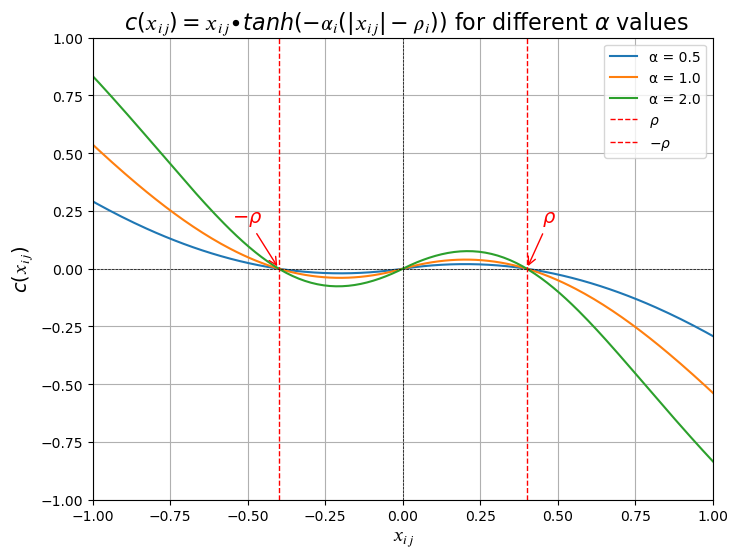

In [ ]:
#
rho= 0.4
# Define the function x_i
def x_i(x_ij, alpha, rho=rho):
    return x_ij * np.tanh(-alpha * (np.abs(x_ij) - rho))

# Define the range for x_ij
x_ij_values = np.linspace(-2, 2, 400)

# Define different alpha values
alpha_values = [0.5, 1.0, 2.0]

# Plot the function for different alpha values
plt.figure(figsize=(8, 6))
x_00 = np.zeros((len(alpha_values), len(x_ij_values)))

for alpha in alpha_values:
    plt.plot(x_ij_values, x_i(x_ij_values, alpha), label=f'α = {alpha}')


# Mark rho values on the x-axis
plt.axvline(rho, color='red', linestyle='dashed', linewidth=1, label=r'$\rho$')
plt.axvline(-rho, color='red', linestyle='dashed', linewidth=1, label=r'$-\rho$')

# Annotate rho values
plt.annotate(r'$\rho$', xy=(rho, 0), xytext=(rho + 0.05, 0.2),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=14, color='red')
plt.annotate(r'$-\rho$', xy=(-rho, 0), xytext=(-rho - 0.15, 0.2),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=14, color='red')



# Customize the plot
plt.xlabel(r'$𝑥_{𝑖𝑗}$', fontsize=14)
plt.ylabel(r'$c(𝑥_{𝑖𝑗})$', fontsize=14)
plt.title(r' $c(𝑥_{𝑖𝑗}) = 𝑥_{𝑖𝑗} ∙ tanh⁡(−𝛼_𝑖 (|𝑥_{𝑖𝑗} | − 𝜌_𝑖))$ for different $\alpha$ values', fontsize=16)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
